## ***Tools***

In [1]:
from langchain_community.tools import ArxivQueryRun
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper
from langchain_community.utilities import ArxivAPIWrapper

In [2]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)

In [3]:
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="Query arxiv papers")

In [4]:
print(arxiv.name)

arxiv


In [5]:
arxiv.invoke("What is the latest research on quantum computing?")

'Published: 2023-05-23\nTitle: Fast and energy-efficient non-volatile III-V-on-silicon photonic phase shifter based on memristors\nAuthors: Zhuoran Fang, Bassem Tossoun, Antoine Descos, Di Liang, Xue Huang, Geza Kurczveil, Arka Majumdar, Raymond G. Beausoleil\nSummary: Silicon photonics has evolved from lab research to commercial products in the\npast decade as it plays an increasingly crucial role in data communication for\nnext-generation data centers and high performance computing1. Recently,\nprogr'

In [6]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)

In [7]:
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)

In [8]:
wiki.name

'wikipedia'

In [9]:
from dotenv import load_dotenv

In [10]:
load_dotenv()

True

In [11]:
import os

In [13]:
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY","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")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY","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")
# os.environ["GOOGLE_API_KEY"]=os.getenv("GOOGLE_API_KEY","gsk_iI9hNRviwQexwwulSAQbWGdyb3FYLO3h6EGyourKsZ2KP8vXPxb9)

In [14]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [15]:
tavily = TavilySearchResults()

In [16]:
tavily.invoke("who is goat in football?")

[{'title': 'What is a GOAT in football?',
  'url': 'https://m.allfootballapp.com/news/Depth/What-is-a-GOAT-in-football/1017389',
  'content': "As the name suggests, the GOAT is not only deemed to be better than all of their contemporaries, but better than everyone who has gone before them as well.\n\nWho is the GOAT in football?\n\n\n\nFootball's GOAT is a matter of continuous debate within the community, but the consensus in recent years has narrowed the question down to one of two players: Ronaldo or Messi. [...] GOAT (or G.O.A.T.) is an acronym which stands for 'greatest of all time'. It is a tag which is reserved for the individual who is deemed to be the undisputed master of their sport.\n\nAs well as exceptional talent, in order to be considered the GOAT, the individual must also maintain a consistent high level of achievement. [...] The dominance of Messi and Ronaldo over the past decade has reduced other iconic football figures to mere afterthoughts, but plenty still lay claim 

## ***Chatbots With Tools***

In [17]:
tools = [arxiv, wiki, tavily]

## ***Initialize the LLM Model***

In [ ]:
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage

# ✅ Set your Groq API Key (replace with your actual key)
import os
os.environ["GROQ_API_KEY"] = "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"

# ✅ Initialize the LLM using Groq (recommended model: `mixtral-8x7b`)
llm = ChatGroq(
    groq_api_key=os.environ["GROQ_API_KEY"],
    model_name="llama-3.3-70b-versatile",  # You can also try `llama3-70b-8192` or `gemma-7b-it`
)
# llm=ChatGroq(model="llama-3.3-70b-versatile")

# ✅ Example prompt
response = llm.invoke([
    HumanMessage(content="Tell me about quantum computing in simple terms.")
])

# ✅ Print the output
print(response.content)

Quantum computing is a new way of processing information that's different from the classical computers we use today. Here's a simplified explanation:

**Classical Computers:**
Classical computers use "bits" to process information. A bit is like a coin that can either be heads (0) or tails (1). These bits are used to perform calculations and store data.

**Quantum Computers:**
Quantum computers use "qubits" (quantum bits) instead of bits. Qubits are special because they can exist in many states at the same time, like being both heads AND tails simultaneously. This property is called "superposition."

Imagine a coin that can be both heads and tails at the same time. This allows quantum computers to process a vast number of possibilities simultaneously, making them much faster than classical computers for certain types of calculations.

**How it Works:**
Quantum computers use the principles of quantum mechanics to perform calculations. They can:

1. Process multiple possibilities simultan

In [36]:
llm_with_tools=llm.bind_tools(tools=tools)

In [ ]:
llm_with_tools.invoke("What is the recent news on AI?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_51g4', 'function': {'arguments': '{"query": "recent news on AI"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 461, 'total_tokens': 482, 'completion_time': 0.076363636, 'prompt_time': 0.067352193, 'queue_time': 0.219325233, 'total_time': 0.143715829}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_6507bcfb6f', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-87d32fb1-2034-4058-933e-3db7070b2e47-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent news on AI'}, 'id': 'call_51g4', 'type': 'tool_call'}], usage_metadata={'input_tokens': 461, 'output_tokens': 21, 'total_tokens': 482})

In [38]:
llm_with_tools.invoke("What is the latest research on quantum computing?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_f055', 'function': {'arguments': '{"query": "quantum computing"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 462, 'total_tokens': 479, 'completion_time': 0.061818182, 'prompt_time': 0.02906438, 'queue_time': 0.218646337, 'total_time': 0.090882562}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_9a8b91ba77', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-9d519d69-a658-428b-8763-b62961aafad6-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'quantum computing'}, 'id': 'call_f055', 'type': 'tool_call'}], usage_metadata={'input_tokens': 462, 'output_tokens': 17, 'total_tokens': 479})

In [39]:
llm_with_tools.invoke("What is machine learning?")

AIMessage(content='<function=wikipedia{"query": "machine learning"}</function>', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 458, 'total_tokens': 473, 'completion_time': 0.068780603, 'prompt_time': 0.029415967, 'queue_time': 0.054722622, 'total_time': 0.09819657}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'finish_reason': 'stop', 'logprobs': None}, id='run-85e124b9-9ddd-4a96-92c4-826615bffd92-0', usage_metadata={'input_tokens': 458, 'output_tokens': 15, 'total_tokens': 473})

## **Workflow**

In [40]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

In [41]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage],add_messages]

## **Entire Chatbot With LangGraph**

In [42]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

## **Node Defination**

In [43]:
def tool_calling_llm(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

## **Build Graph**

In [44]:
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools=tools))

## **Edgess**

In [45]:
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", END)

In [46]:
graph = builder.compile()

In [47]:
# view
display(Image(graph.get_graph().draw_mermaid_png()))

ValueError: Failed to reach https://mermaid.ink/ API while trying to render your graph. Status code: 400.

To resolve this issue:
1. Check your internet connection and try again
2. Try with higher retry settings: `draw_mermaid_png(..., max_retries=5, retry_delay=2.0)`
3. Use the Pyppeteer rendering method which will render your graph locally in a browser: `draw_mermaid_png(..., draw_method=MermaidDrawMethod.PYPPETEER)`

In [48]:
messages=graph.invoke({"messages":"1706.03762"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================

It appears you've provided a numerical string, possibly a code or identifier. Without more context, it's difficult to provide a specific answer. Could you please provide more information or clarify what this number refers to? Is it a:

1. Mathematical or scientific constant?
2. Code or identifier for a specific project or system?
3. Version number or serial number?
4. A number related to a research paper or publication (given the format, it resembles an arXiv ID)?

With more details, I'd be happy to try and assist you further.


In [50]:
messages=graph.invoke({"messages":"My name is emon"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

My name is emon
================================== Ai Message ==================================

Hello Emon, it's nice to meet you. Is there something I can help you with or would you like to chat?


## **Node definition**

In [51]:
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

## **Build graph**

In [52]:
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## **Edges**

In [53]:
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "tool_calling_llm")

In [54]:
graph = builder.compile()

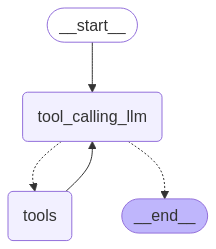

In [55]:
# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [56]:
messages=graph.invoke({"messages":"What is the recent AI news and then please tell me the recent research paper on quantum computing?"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the recent AI news and then please tell me the recent research paper on quantum computing?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_wv84)
 Call ID: call_wv84
  Args:
    query: recent AI news
  arxiv (call_rztb)
 Call ID: call_rztb
  Args:
    query: recent research paper on quantum computing
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Artificial Intelligence - Latest AI News and Analysis - WSJ.com", "url": "https://www.wsj.com/tech/ai", "content": "The latest artificial intelligence news coverage focusing on the technology, tools and the companies building AI technology.", "score": 0.7147281}, {"title": "Artificial intelligence - NBC News", "url": "https://www.nbcnews.com/artificial-intelligence", "content": "NBC News NOW\n\n01:0